2021-12-07 <br/>
Spiders <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-12-07/readme.md

Multiple plots in one Figure - Completed <br/>
Button Interaction - Completed

https://www.geeksforgeeks.org/how-to-make-custom-buttons-in-plotly/

In [6]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='notebook'
import os


In [7]:
df =pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-07/spiders.csv')

In [8]:
df.head()

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
0,1,urn:lsid:nmbe.ch:spidersp:000896,Actinopodidae,Actinopus,caraiba,NaN,Simon,1889,1,Venezuela
1,2,urn:lsid:nmbe.ch:spidersp:000898,Actinopodidae,Actinopus,crassipes,NaN,Keyserling,1891,1,"Brazil, Paraguay, Argentina"
2,3,urn:lsid:nmbe.ch:spidersp:000899,Actinopodidae,Actinopus,cucutaensis,NaN,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil"
3,4,urn:lsid:nmbe.ch:spidersp:000900,Actinopodidae,Actinopus,dubiomaculatus,NaN,Mello-Leitão,1923,0,Brazil
4,5,urn:lsid:nmbe.ch:spidersp:000901,Actinopodidae,Actinopus,echinus,NaN,Mello-Leitão,1949,0,Brazil


In [33]:
# Top 5 spiders - By quantity
names= df.groupby(['family'])['family'].count().sort_values(ascending=False)[:3].index

In [34]:
df_spiders= df[df.family.isin(names)]

In [35]:
df_spiders.head()

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
2328,2375,urn:lsid:nmbe.ch:spidersp:014406,Araneidae,Acacesia,benigna,NaN,Glueck,1994,0,"Peru, Bolivia, Brazil"
2329,2376,urn:lsid:nmbe.ch:spidersp:014408,Araneidae,Acacesia,graciosa,NaN,Lise & Braul,1996,0,Brazil
2330,2377,urn:lsid:nmbe.ch:spidersp:014409,Araneidae,Acacesia,hamata,NaN,Hentz,1847,1,USA to Argentina
2331,2378,urn:lsid:nmbe.ch:spidersp:017149,Araneidae,Acacesia,tenella,NaN,L. Koch,1871,1,"Mexico to Brazil, French Guiana, Guyana"
2332,2379,urn:lsid:nmbe.ch:spidersp:014410,Araneidae,Acacesia,villalobosi,NaN,Glueck,1994,0,Brazil


In [36]:
df_spiders_grouped=df_spiders.groupby(['family','year'])['family'].count().reset_index(name='counts')

In [39]:
# plotting the bar chart - Individual
fig = px.bar(df_spiders_grouped, x='year', y='counts', color='family')
  
# showing the plot
fig.show()

In [42]:
# plotting the scatter chart - Individual
fig = px.scatter(df_spiders_grouped, x='year', y='counts', color='family',)
  
# showing the plot
fig.show()

In [73]:
#Combine both the plots

import plotly.graph_objects as px
import numpy as np
  
  
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
  
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)
  

plot = px.Figure(data=[px.Scatter(
    x=df_spiders_grouped[df_spiders_grouped.family=='Araneidae'].year,
    y=df_spiders_grouped[df_spiders_grouped.family=='Araneidae'].counts,
    mode='markers',
    name= 'Araneidae',
    marker_color='darkorange')

    , px.Scatter(
    x=df_spiders_grouped[df_spiders_grouped.family=='Salticidae'].year,
    y=df_spiders_grouped[df_spiders_grouped.family=='Salticidae'].counts,
    mode='markers',
    name= 'Salticidae',
    marker_color='steelblue')

     , px.Scatter(
    x=df_spiders_grouped[df_spiders_grouped.family=='Linyphiidae'].year,
    y=df_spiders_grouped[df_spiders_grouped.family=='Linyphiidae'].counts,
    mode='markers',
    name='Linyphiidae',
    marker_color='springgreen')

])

# Add dropdown
plot.update_layout(
    #title= "Test",
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "Scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
  
plot.show()

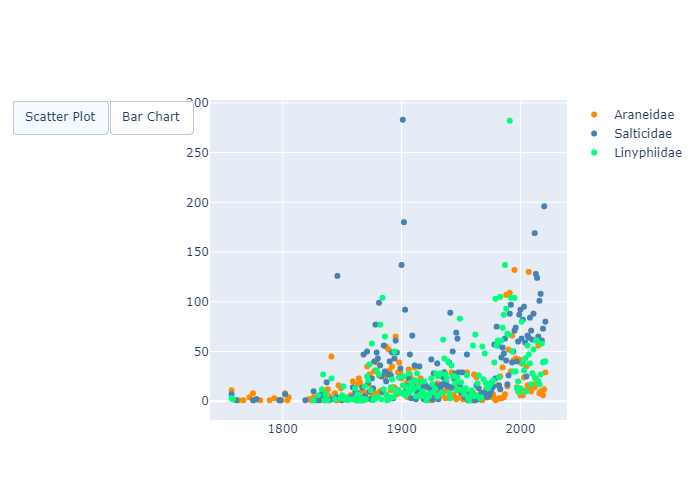

In [75]:
# Display Output in production
img_bytes = plot.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

### Demo

In [76]:
#Same Data Different Plots

import plotly.graph_objects as px
import numpy as np
  
  
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
  
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)
  
plot = px.Figure(data=[px.Scatter(
    x=random_x,
    y=random_y,
    mode='markers',)
])
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
  
plot.show()

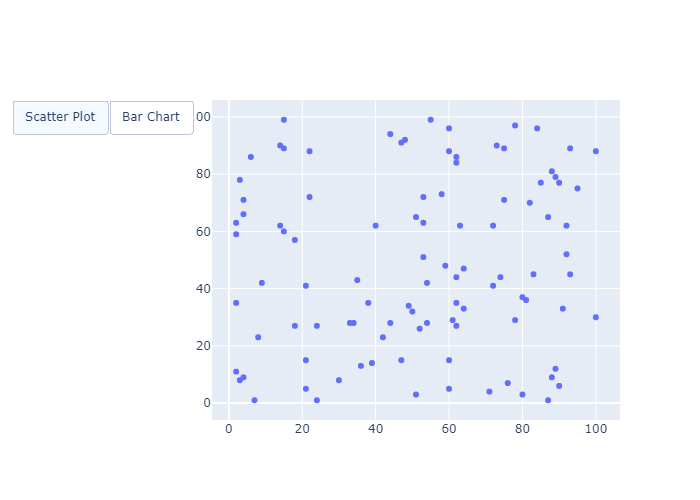

In [77]:
# Display Output in production
img_bytes = plot.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [78]:
# Different Data Different plots
import plotly.graph_objects as go
import numpy
  
  
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
  
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)
  
x = ['A', 'B', 'C', 'D']
  
plot = px.Figure(data=[go.Bar(
    name='Data 1',
    x=x,
    y=[100, 200, 500, 673]
),
    go.Bar(
    name='Data 2',
    x=x,
    y=[56, 123, 982, 213]
)
])
  
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Data 1",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1",
                            }]),
                dict(label="Data 2",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2",
                            }]),
            ]),
        )
    ])
  
plot.show()

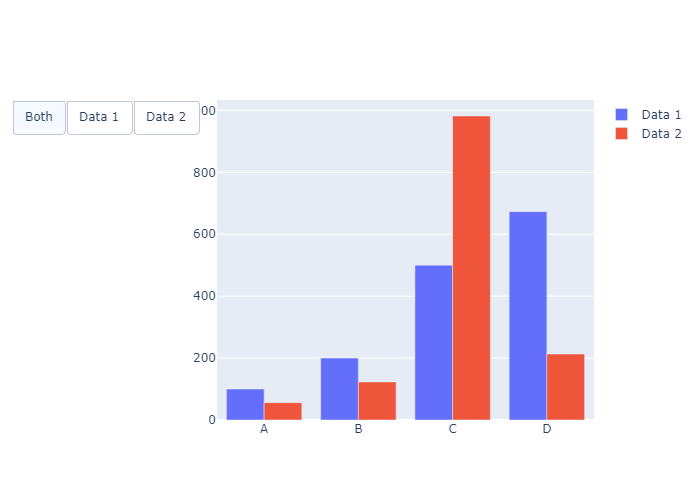

In [79]:
# Display Output in production
img_bytes = plot.to_image(format="png")
from IPython.display import Image
Image(img_bytes)